# Introduces the distributions in TensorFlow Probability

A **very** brief introduction in distributions in TFP.

* Introduction of Distributions
* Introduction to Layers

In [1]:
try: #If running in colab 
    import google.colab
    IN_COLAB = True 
    %tensorflow_version 2.x
except:
    IN_COLAB = False

In [2]:
import tensorflow as tf
if (not tf.__version__.startswith('2')): #Checking if tf 2.0 is installed
    print('Please install tensorflow 2.0 to run this notebook')
print('Tensorflow version: ',tf.__version__, ' running in colab?: ', IN_COLAB)

Tensorflow version:  2.4.1  running in colab?:  True


In [3]:
# If you are not running in colab or use the provided docker container, you might need to install TFP
#!pip install tensorflow_probability==0.8.0

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow_probability as tfp #<------
tfd = tfp.distributions

## Distributions for categorical data
### The Bernoulli Distribution (2-Classes)

In the Bernoulli Distribution the outcome is a single value either 0 or 1 

In [5]:
dist = tfd.Bernoulli(probs=0.1)

In [6]:
dist.mean(), dist.variance()

(<tf.Tensor: shape=(), dtype=float32, numpy=0.1>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.089999996>)

In [7]:
0.1*(1.0-0.1) #Calculation of the variance

0.09000000000000001

In [8]:
dist.sample(55)

<tf.Tensor: shape=(55,), dtype=int32, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>

In [9]:
dist.prob(1.0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.099999994>

### The Categorical / Multinomial Distribution (more than 2 classes)

In the multinomial distribution the outcome is a one-hot encoded vector.

In [10]:
#dist = tfd.Multinomial(probs=(0.5, 0.3, 0.2), total_count=1)
dist = tfd.OneHotCategorical(probs=(0.5, 0.3, 0.2))

In [11]:
dist.sample(10)

<tf.Tensor: shape=(10, 3), dtype=int32, numpy=
array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]], dtype=int32)>

In [12]:
import numpy as np
np.mean(dist.sample(10000).numpy(), axis=0)

array([0.4902, 0.3036, 0.2062])

In [13]:
dist.mean()

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.5, 0.3, 0.2], dtype=float32)>

## Continous Data
### The Normal distribution
The normal distribution samples a single value from a Gaussian

In [14]:
dist = tfd.Normal(loc=1,scale=2)
dist.mean(), dist.variance()

(<tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.0>)

In [15]:
dist.sample(10)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-1.3369699 , -2.155844  ,  0.26631767, -1.2070868 ,  0.9989343 ,
        2.4059124 , -2.1083305 ,  2.3806727 ,  2.9147403 ,  1.6497833 ],
      dtype=float32)>

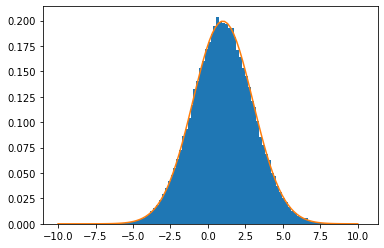

In [16]:
plt.hist(dist.sample(100000),100, density=True)
x = np.linspace(-10,10,100)
plt.plot(x, dist.prob(x))
plt.show()

## Count Data
### The Poisson

2.3
2.3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


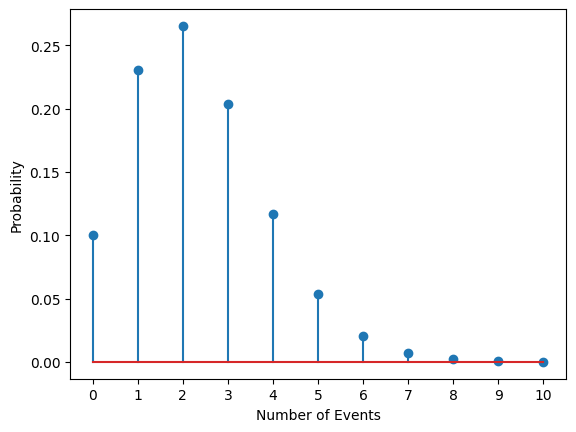

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

dist = tfd.poisson.Poisson(rate = 2.3) #A
vals = np.linspace(0,10,11) #B
p = dist.prob(vals) #C
print(dist.mean().numpy())  #D
print(dist.variance().numpy())   #E

plt.xticks(vals)
plt.stem(vals, p)
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.show()

#A Poisson distribution with parameter rate = 2.3
#B Integer values from 0 to 10 for the x-axis 
#C Computes the probability for the values
#D The mean value yielding 2.3
#E The standard deviation yielding 2.3

# The Lambda Layer

In [18]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def my_dist(params): 
  return tfd.Normal(
      loc=params[:,0:1], #First for location
      scale=1e-3 + tf.math.softplus(0.05 * params[:,1:2])
  )

inputs = Input(shape=(1,))
h1  = Dense(10)(inputs)
# Here could be large network
params = Dense(2)(h1) #We have to parameters
dist = tfp.layers.DistributionLambda(my_dist)(params) #Connecting Network
model = Model(inputs=inputs, outputs=dist) 
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
_________________________________________________________________
distribution_lambda (Distrib multiple                  0         
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [21]:
def NLL(y, distr): 
  return -distr.log_prob(y) #Just NLL, works for all distributions

model.compile(Adam(), loss=NLL) #F

In [25]:
model = Model(inputs=inputs, outputs=dist) 
x = np.asarray([[1],[2.3]], dtype='float32')
x.shape
cpd = model(x) # Returns a CPD of the x

In [26]:
cpd.mean() #The expectations at the positions

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-0.24419746],
       [-0.5616542 ]], dtype=float32)>

In [28]:
cpd.stddev() #The spread at the positions

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.71965677],
       [0.75376725]], dtype=float32)>

Training can be done the usual way by calling model.fit